# ControlNet (OpenPose) using Stable Diffusion 1.5

<a target="_blank" href="https://colab.research.google.com/github/simonguest/CS-394/blob/main/src/04/notebooks/controlnet-openpose-sd-1.5.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://github.com/simonguest/CS-394/raw/refs/heads/main/src/04/notebooks/controlnet-openpose-sd-1.5.ipynb">
  <img src="https://img.shields.io/badge/Download_.ipynb-blue" alt="Download .ipynb"/>
</a>

## Install prerequisites

In [1]:
!uv pip install -q diffusers==0.30.0 transformers==4.44.0 accelerate controlnet_aux pillow

## Original image

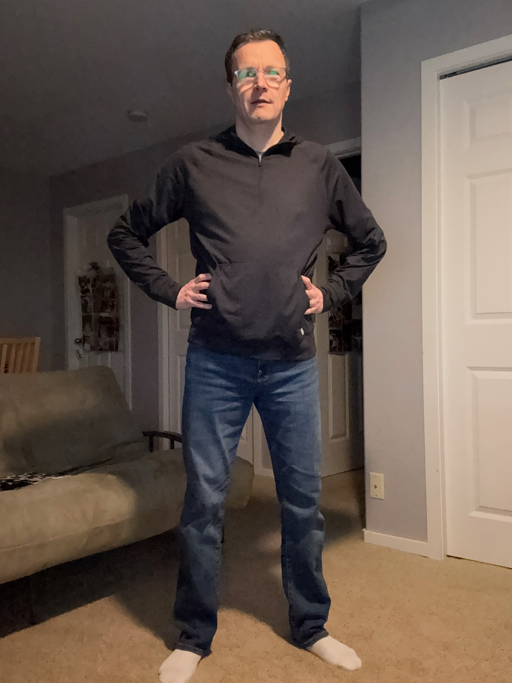

In [6]:
from diffusers.utils import load_image

INPUT_IMAGE = "https://raw.githubusercontent.com/simonguest/CS-394/refs/heads/main/src/04/images/pose.jpg"

input_image = load_image(INPUT_IMAGE)
input_image = input_image.resize((512, 683))
display(input_image)

## Load OpenPose detector

In [ ]:
from controlnet_aux import OpenposeDetector

openpose = OpenposeDetector.from_pretrained('lllyasviel/ControlNet')

## Derive skeletal pose

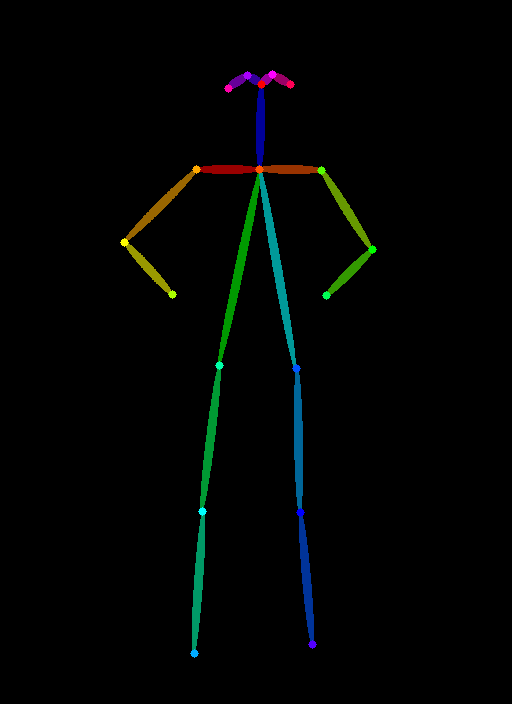

In [8]:
pose_image = openpose(input_image)
display(pose_image)

## Load ControlNet model

In [11]:
import torch
from diffusers import ControlNetModel

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_openpose",
    torch_dtype=torch.float16
)

## Load SD 1.5 model and "plug in" controlnet model

In [16]:
from diffusers import StableDiffusionControlNetPipeline

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    use_safetensors=True
)
pipe.to("cuda")

Keyword arguments {'generators': [<torch._C.Generator object at 0x7e3df76b3410>]} are not expected by StableDiffusionControlNetPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.30.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Generate new image with human pose as condition

  0%|          | 0/25 [00:00<?, ?it/s]

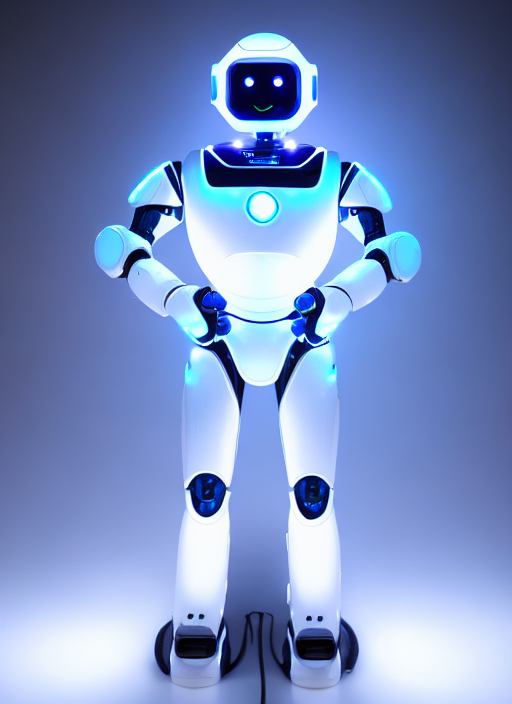

In [35]:
PROMPT = "a robot with glowing LED lights, futuristic, sci-fi"
NEGATIVE_PROMPT = "blurry, low quality, distorted, extra limbs, deformed"
SEED = 3434002

result = pipe(
    prompt=PROMPT,
    negative_prompt=NEGATIVE_PROMPT,
    image=pose_image,
    num_inference_steps=25,
    guidance_scale=7.5,
    controlnet_conditioning_scale=1.0,
    generator=torch.manual_seed(SEED) if SEED != -1 else None
).images[0]
display(result)